LE404A - General Physics III

***Numerical Work 01:*** *Calculation of the Electric Field of a Uniformly Charged Ring - Any Position*

Responsible: Marcelo Zoéga Maialle

Date: 30/09/2021

Group members:
*   Augusto Chebel Machado            RA: 231762
*   Leonardo de Lima Paiva            RA: 220057
*   Lucas Tramonte                    RA: 182697
*   Vinícius Consentino Muniz         RA: 245271


## Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Plotting the vector field

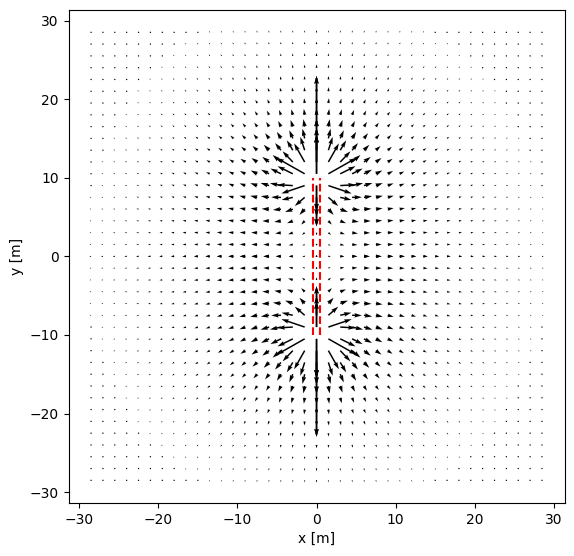

In [2]:
# input data:
Q = 10**(-6)  # [C]
R = 10        # [m]
K = 9*10**(9) # [N*m²/C²]

dlc = Q/(2*np.pi*R)   # linear charge density

N_elem = 20           # number of elements generating grid points (x and y)

elem = 0
lista_elem = [0]
for i in range(0, N_elem - 1):    # generating the elements
  elem = elem + (3*R/N_elem)      # values in the step of (3*R/20)
  lista_elem.append(elem)         # adding to the list

coord_x = N_elem*lista_elem       # list storing x coordinates

coord_y = []                      # list storing y coordinates
for i in range (0, N_elem):
  cont = 0
  while (cont < N_elem):
    coord_y.append(lista_elem[i])
    cont = cont + 1
    
# At the end of this process, we have two lists x and y, which together form the points (x, y) of the grid

N = 100                        # #of “infinitesimal” pieces of theta (ring)
dtheta = 2*np.pi/N              # an “infinitesimal” piece dtheta

# defining the functions Ex and Ey, for the given x and y (numerical integration - midpoint rule):
def Ex(x, y):
  result = 0
  for i in range (0, N+1):
    result = result + dtheta*K*dlc*R*x/((np.sqrt(x**2 + y**2 - 2*y*R*np.sin(dtheta/2 + i*dtheta) + R**2)**3))
  return result

def Ey(x, y):
  result = 0
  for i in range (0, N+1):
    result = result + dtheta*K*dlc*R*(y-R*np.sin(dtheta/2 + i*dtheta))/((np.sqrt(x**2 + y**2 - 2*y*R*np.sin(dtheta/2 + i*dtheta) + R**2)**3))
  return result

dirEx = []                                  # intensity of E in the x direction (will be the direction indicator in the quiver() function)
dirEy = []                                  # intensity of E in the y direction
for i in range (0, len(coord_x)):           # calculating the intensity and adding it to the lists for each for (x, y)
  dirEx.append(Ex(coord_x[i], coord_y[i]))
  dirEy.append(Ey(coord_x[i], coord_y[i]))

coord_x_neg = []                            # creating the points with negative coordinates
coord_y_neg = []
dirEx_neg = []                              # creating directions with negative coordinates
dirEy_neg = []
for i in range (0, len(coord_x)):
  coord_x_neg.append(-1*coord_x[i])
  coord_y_neg.append(-1*coord_y[i])
  dirEx_neg.append(-1*dirEx[i])
  dirEy_neg.append(-1*dirEy[i])
# at the end of this process we have for each pair (x,y) a direction (Ex, Ey) for all grid points

# plotting the vector field
plt.figure(1, figsize=[6.4, 6.4])                                  
plt.quiver(coord_x, coord_y, dirEx, dirEy, scale=3000)             # plt.quiver has as arguments: (point x, point y, direction x, direction y)
plt.quiver(coord_x_neg, coord_y, dirEx_neg, dirEy, scale=3000)
plt.quiver(coord_x, coord_y_neg, dirEx, dirEy_neg, scale=3000)
plt.quiver(coord_x_neg, coord_y_neg, dirEx_neg, dirEy_neg, scale=3000)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.vlines(-0.05*R, -R, R, colors='red', linestyles='dashed') # ring representation
plt.vlines(0.05*R, -R, R, colors='red', linestyles='dashed')  # for visualization purposes only, the ring has no “thickness”, it is linear

plt.show()

## Plotting the theoretical vectors on the x-axis for visual comparison with the numerical vectors

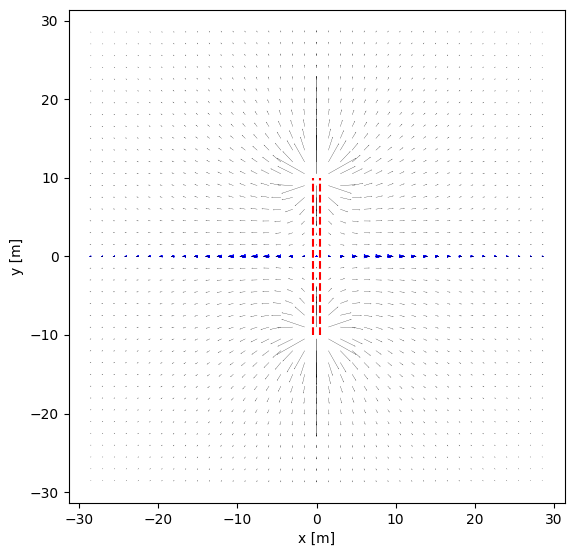

In [3]:
def E_teor(x):                                  # defining the function that calculates the field strength on the x-axis (for a ring)
  return K*Q*x/(np.power((x**2 + R**2), 3/2))

Eteor = []                                      # list to store the values for each point of type (x, 0)
Eteor_neg = []                                  # negative field values on the x-axis
for i in range (0, len(coord_x)):               # add to the list the values calculated by the function for each x in the grid
  Eteor.append(E_teor(coord_x[i]))
  Eteor_neg.append(E_teor(coord_x_neg[i]))

# plotting the comparative vector field
plt.figure(2, figsize=[6.4, 6.4])
plt.quiver(coord_x, 0, Eteor, 0, color='blue', scale=3000)
plt.quiver(coord_x_neg, 0, Eteor_neg, 0, color='blue', scale=3000)
plt.quiver(coord_x, coord_y, dirEx, dirEy, width=0.0005, scale=3000)
plt.quiver(coord_x_neg, coord_y, dirEx_neg, dirEy, width=0.0005, scale=3000)
plt.quiver(coord_x, coord_y_neg, dirEx, dirEy_neg, width=0.0005, scale=3000)
plt.quiver(coord_x_neg, coord_y_neg, dirEx_neg, dirEy_neg, width=0.0005, scale=3000)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.vlines(-0.05*R, -R, R, colors='red', linestyles='dashed') # for visualization purposes only, the ring has no “thickness”, it is linear
plt.vlines(0.05*R, -R, R, colors='red', linestyles='dashed')

plt.show()

In [4]:
len(coord_x)

400

## Plotting the field lines

note: the streamplot function requires the coordinates and directions to be given in matrices, so it is necessary to create a new grid of points and new direction functions.

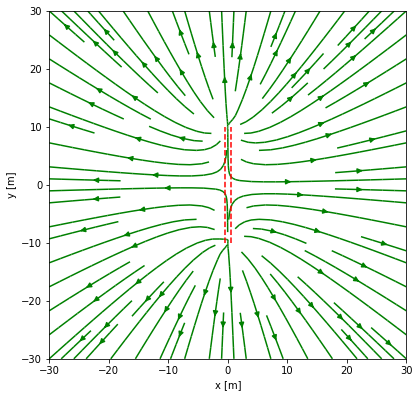

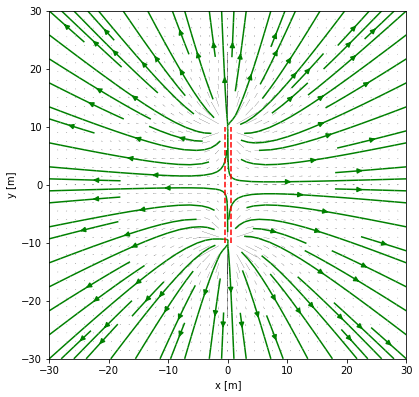

In [ ]:
# New x and y grid:
x,y = np.meshgrid(np.linspace(-3*R, 3*R, 2*N_elem),np.linspace(-3*R, 3*R, 2*N_elem))

# new direction functions:
def f_x(theta):
  return K*dlc*R*x/((np.sqrt(x**2 + y**2 - 2*y*R*np.sin(theta) + R**2)**3))

def f_y(theta):
  return K*dlc*R*(y-R*np.sin(theta))/((np.sqrt(x**2 + y**2 - 2*y*R*np.sin(theta) + R**2)**3))

def Ex(x):
  result = 0
  for i in range(0, N+1):
    result = result + dtheta*f_x(i*dtheta)
  return result

def Ey(y):
  result1 = 0
  for j in range(0, N+1):
    result1 = result1 +  dtheta*f_y(j*dtheta)
  return result1

# plotting the field lines:
plt.figure(3, figsize=[6.4, 6.4])
plt.streamplot(x, y, Ex(x), Ey(y), density=1.0, color='green')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.vlines(-0.05*R, -R, R, colors='red', linestyles='dashed') # for visualization purposes only, the ring has no “thickness”, it is linear
plt.vlines(0.05*R, -R, R, colors='red', linestyles='dashed')

plt.show()
print()

# plotting the field lines with the background vector field:
plt.figure(4, figsize=[6.4, 6.4])
plt.streamplot(x, y, Ex(x), Ey(y), density=1.0, color='green')
plt.quiver(coord_x, coord_y, dirEx, dirEy, width=0.0005, scale=3000)
plt.quiver(coord_x_neg, coord_y, dirEx_neg, dirEy, width=0.0005, scale=3000)
plt.quiver(coord_x, coord_y_neg, dirEx, dirEy_neg, width=0.0005, scale=3000)
plt.quiver(coord_x_neg, coord_y_neg, dirEx_neg, dirEy_neg, width=0.0005, scale=3000)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.vlines(-0.05*R, -R, R, colors='red', linestyles='dashed') # for visualization purposes only, the ring has no “thickness”, it is linear
plt.vlines(0.05*R, -R, R, colors='red', linestyles='dashed')

plt.show()

## Creating a table to compare numerical and theoretical values

In [8]:
# defining the function that will calculate the magnitude of the field from the numerical Ex and Ey components
def mag_E(E_x, E_y):
  return np.sqrt(np.power(E_x, 2) + np.power(E_y, 2))

magEnum = []                                   # magnitude of each point (numeric)
magEalta=[]                                    # magnitude of each point that is very intense.(numeric)
cx=[]                                          # list to get the coordinates that have high field strength.
cy=[]
for i in range(0, len(lista_elem)):
  magEnum.append(round(mag_E(dirEx[i], dirEy[i]), 4))

for i in range(0,len(coord_x)):                # structure to determine points that have field magnitudes greater than 100 N/C.
  if mag_E(dirEx[i], dirEy[i]) > 100:
    magEalta.append(mag_E(dirEx[i], dirEy[i]))
    cx.append(coord_x[i])
    cy.append(coord_y[i])
magEteor = []
for x in lista_elem:                           # add to the list the values ​​calculated by the function for each x in the grid
  magEteor.append(round(E_teor(x), 4))

erro  = []
for i in range (0, len(magEnum)):
  erro_num_teor = 100*math.fabs((magEteor[i] - magEnum[i])/magEteor[i])
  erro.append(round(erro_num_teor, 4))

# creating the table
dados = {'x coordinate [m]': lista_elem, '|E numeric|[N/C]': magEnum, '|E theoretical|[N/C]': magEteor, 'Error [%]': erro}

pd.DataFrame(dados)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13520\2464842442.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  erro_num_teor = 100*math.fabs((magEteor[i] - magEnum[i])/magEteor[i])


,x coordinate [m],|E numeric|[N/C],|E theoretical|[N/C],Error [%]
0,0.0,0.0283,0.0000,inf
1,1.5,13.1875,13.0569,1.0002
2,3.0,23.9632,23.7260,0.9997
3,4.5,31.0205,30.7134,0.9999
4,6.0,34.3880,34.0475,1.0001
5,7.5,34.9056,34.5600,1.0000
6,9.0,33.5961,33.2634,1.0002
7,10.5,31.3076,30.9976,1.0001
8,12.0,28.6194,28.3360,1.0001
9,13.5,25.8790,25.6227,1.0003


## Creating a graph comparing the intensity on the x-axis:

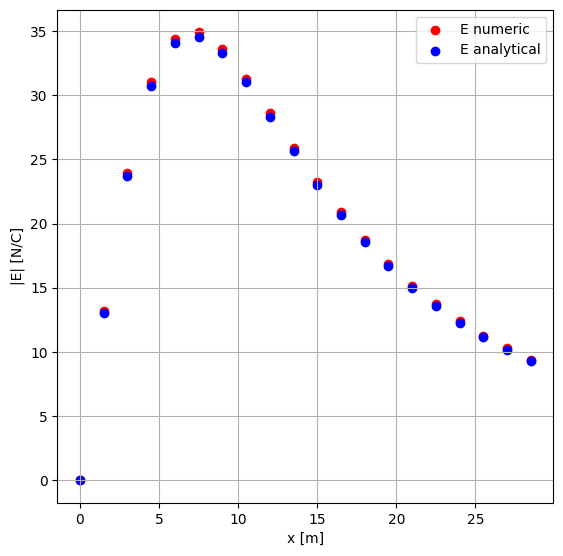

In [9]:
plt.figure(1, figsize=[6.4, 6.4])
plt.grid()
plt.scatter(lista_elem, magEnum, color='red', label='E numeric')
plt.scatter(lista_elem, magEteor, color='blue', label='E analytical')
plt.legend()
plt.xlabel('x [m]')
plt.ylabel('|E| [N/C]')

plt.show()

## Creating the table for largest field values ​​(magnitudes):

In [11]:
dados = {'x coordinate [m]': cx, 'y coordinate [m]':cy,'|E numeric|[N/C]':magEalta}

pd.DataFrame(dados)


,x coordinate [m],y coordinate [m],|E numeric|[N/C]
0,0.0,9.0,247.000625
1,1.5,9.0,148.721895
2,0.0,10.5,590.118564
3,1.5,10.5,194.231357
4,3.0,10.5,103.230936
5,0.0,12.0,162.406237
6,1.5,12.0,129.423635


## Creating the continuous graph of the function that calculates the theoretical E

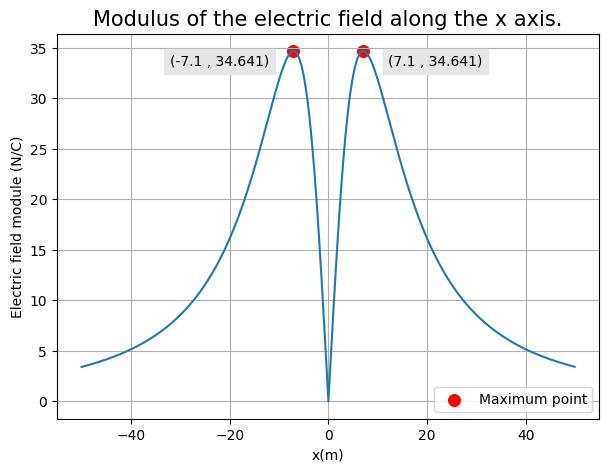

<Figure size 640x480 with 0 Axes>

In [12]:
x=np.arange(-50,50,0.1)

# creating the figure:
plt.figure(figsize=[7,5])
plt.grid()
plt.title('Modulus of the electric field along the x axis.',fontsize=15)
plt.xlabel('x(m)',fontsize=10)
plt.ylabel('Electric field module (N/C)',fontsize=10)
plt.plot(x,abs(E_teor(x)))

maximo=max(E_teor(x))
maxx=0
for i in x:
  if E_teor(i) == maximo:
    maxx=i

plt.scatter(maxx,(E_teor(maxx)),color='r',s=70,label="Maximum point")
plt.scatter(-maxx,(E_teor(maxx)),color='r',s=70)
plt.legend(loc='lower right',fontsize=10)

plt.text(maxx+5,0.96*E_teor(maxx),f"({round(maxx,3)} , {round(E_teor(maxx),3)})",fontsize=10,backgroundcolor='0.9')
plt.text(-maxx-25,0.96*E_teor(maxx),f"({round(-maxx,3)} , {round(E_teor(maxx),3)})",fontsize=10,backgroundcolor='0.9')
plt.show()